In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv("us_perm_visas.csv")

/Users/dweepa/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
values = array(data['case_status'])
print(values)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
data['case_status'] = integer_encoded

['Certified' 'Denied' 'Certified' ..., 'Withdrawn' 'Withdrawn' 'Withdrawn']
[0 2 0 ..., 3 3 3]


add_these_pw_job_title_9089


/Users/dweepa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Acceptance Ratio: 0.37956033676333023


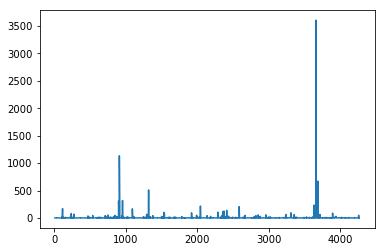

agent_city
Acceptance Ratio: 0.7138193688792165


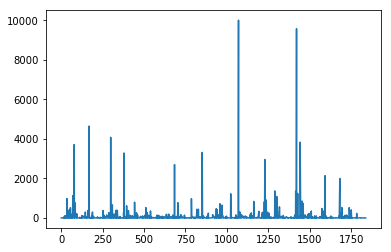

agent_firm_name
Acceptance Ratio: 0.6705476073014307


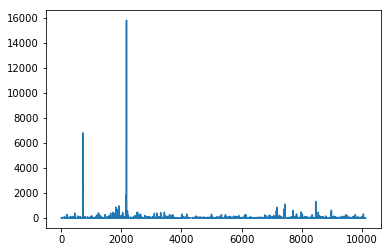

agent_state
Acceptance Ratio: 0.9537037037037037


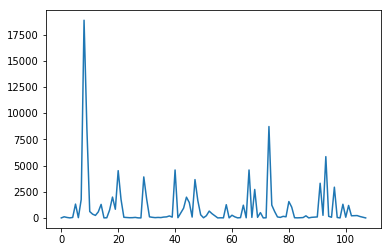

application_type
Acceptance Ratio: 1.0


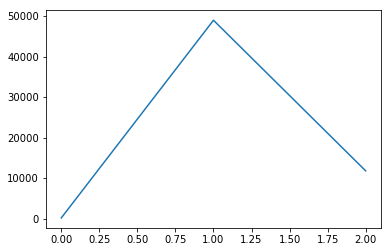

case_no
Acceptance Ratio: 0.4516186384176606


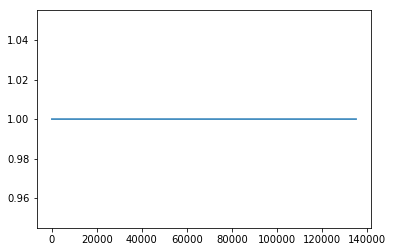

case_number
Acceptance Ratio: 0.5073568270852032


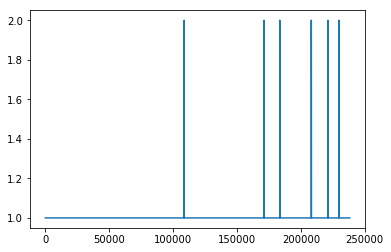

case_received_date
Acceptance Ratio: 0.6339449541284403


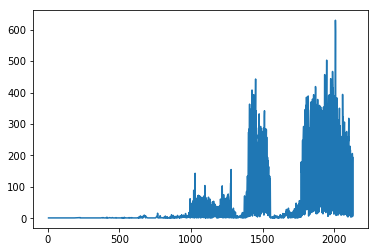

case_status
class_of_admission
Acceptance Ratio: 0.9122807017543859


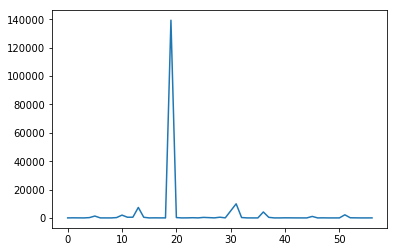

country_of_citizenship
Acceptance Ratio: 0.9158415841584159


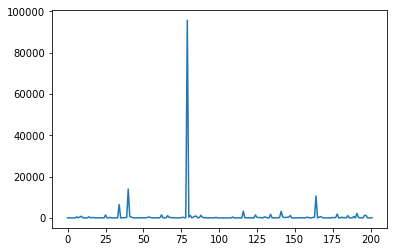

country_of_citzenship
Acceptance Ratio: 0.8986486486486487


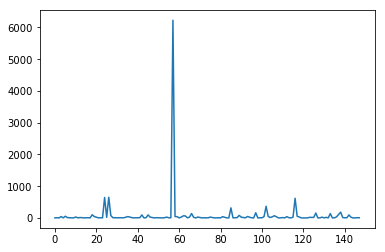

decision_date
Acceptance Ratio: 0.45448275862068965


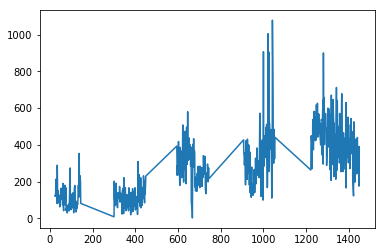

employer_address_1
Acceptance Ratio: 0.5973264239853081


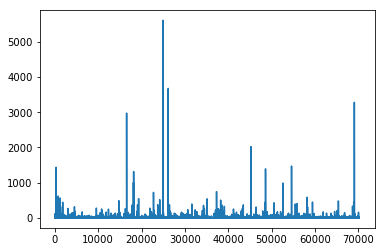

employer_address_2
Acceptance Ratio: 0.6914156056977184


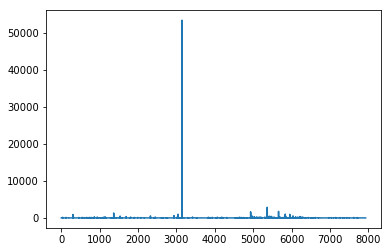

employer_city
Acceptance Ratio: 0.7415314885496184


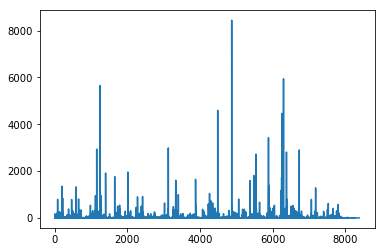

employer_country
Acceptance Ratio: 0.6666666666666666


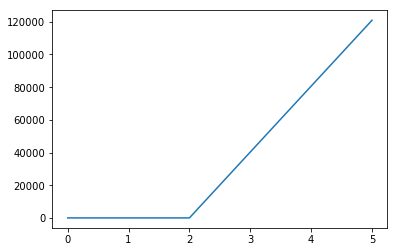

employer_decl_info_title
Acceptance Ratio: 0.6387038158691702


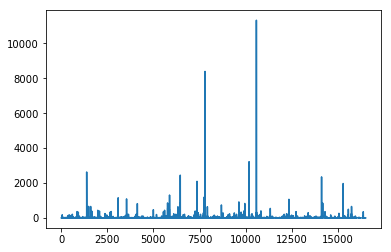

employer_name
Acceptance Ratio: 0.5945557740311537


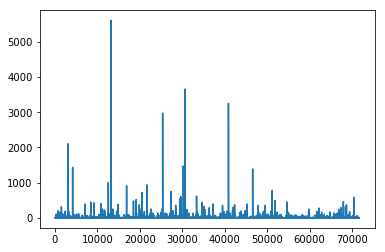

employer_num_employees
Acceptance Ratio: 0.8243035753454705


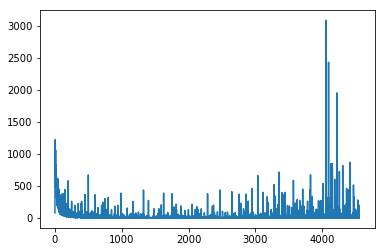

employer_phone
Acceptance Ratio: 0.6142015440877692


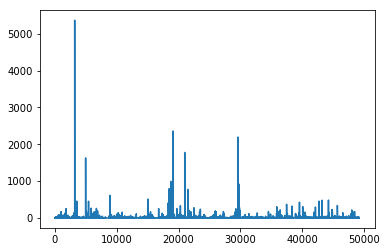

employer_phone_ext


TypeError: '>' not supported between instances of 'float' and 'str'

In [5]:
for i in data.columns:
    print(i)
    if(i!='case_status'):
        temp = data
        temp = temp.dropna(subset=[i])
        n = len(temp)
        values = array(temp[i])
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(values)
#         print(values,integer_encoded)
        temp[i] = integer_encoded
        temp = temp[[i,'case_status']]
        temp2 = temp
        temp2 = temp2.groupby([i])
        temp2 = temp2.count()
        temp = temp.loc[temp['case_status']==0]
        temp = temp.groupby([i])
        temp = temp.count()
#         print(temp)
        print("Acceptance Ratio:",float(len(temp))/float(len(temp2)))
        plt.plot(temp['case_status'])
        plt.show()